In [2]:
%matplotlib inline

In [11]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split

from eli5.sklearn import PermutationImportance

In [17]:
def plot_feature_importances(importances, std):
    indices = np.argsort(importances)[::-1]
    plt.figure()
    plt.title("Feature importances")
    plt.bar(range(X.shape[1]), importances[indices],
           color="r", yerr=std[indices], align="center")
    plt.xticks(range(X.shape[1]), indices)
    plt.xlim([-1, X.shape[1]])
    plt.show()

In [9]:
# Build a classification task using 3 informative features
X, y = make_classification(n_samples=2000,
                           n_features=10,
                           n_informative=3,
                           n_redundant=2,
                           n_repeated=1,
                           n_classes=2,
                           random_state=0,
                           shuffle=False)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=2244)

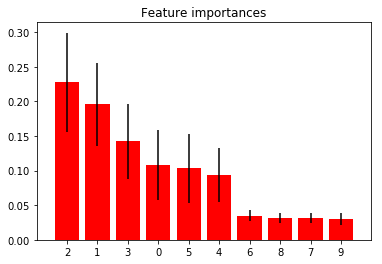

In [18]:
# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X_train, y_train)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)

plot_feature_importances(importances, std)

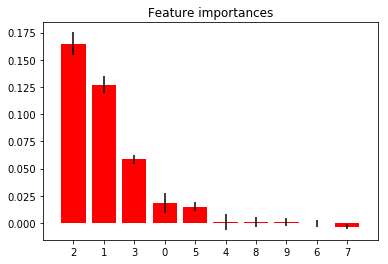

In [19]:
perm = PermutationImportance(forest).fit(X_test, y_test)
plot_feature_importances(perm.feature_importances_, perm.feature_importances_std_)